In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
train1000100 = pd.read_csv("./HW1_dataset/train-1000-100.csv")

In [43]:
train50 = train1000100.head(50)
train100 = train1000100.head(100)
train150 = train1000100.head(150)

In [44]:
train50.to_csv("./HW1_dataset/train-50(1000)-100.csv", index=False)
train100.to_csv("./HW1_dataset/train-100(1000)-100.csv", index=False)
train150.to_csv("./HW1_dataset/train-150(1000)-100.csv", index=False)

In [45]:
train10010 = pd.read_csv("./HW1_dataset/train-100-10.csv")
train100100 = pd.read_csv("./HW1_dataset/train-100-100.csv")

In [46]:
test10010 = pd.read_csv("./HW1_dataset/test-100-10.csv")
test100100 = pd.read_csv("./HW1_dataset/test-100-100.csv")
test1000100 = pd.read_csv("./HW1_dataset/test-1000-100.csv")

In [47]:
def l2_regression(X, y, lamb):
    I = np.eye(X.shape[1])
    w = np.linalg.inv((X.T @ X) + (lamb * I)) @ X.T @ y
    return w

In [48]:
def find_mse(X, y, w):
    prediction = X @ w
    return np.mean((prediction - y)**2)

In [49]:
lambdas = np.arange(151)
mse_train = []
mse_test = []

#### Implementing L2 regularized linear regression and displaying the MSE-Lambda plots for all 6 datasets:

In [50]:
def get_mse(train, test, lambdas):

    # to remove emty columns
    train = train.loc[:, ~train.columns.str.contains('^Unnamed')]
    xtrain = train.drop(columns=["y"]).values
    ytrain = train['y'].values
    
    xtest = test.drop(columns=["y"]).values
    ytest = test['y'].values
    
    train_mse = []
    test_mse = []
    
    for lamb in lambdas:
        w = l2_regression(xtrain, ytrain, lamb)
        train_mse.append(find_mse(xtrain, ytrain, w))
        test_mse.append(find_mse(xtest, ytest, w))
    return train_mse, test_mse

In [51]:
def plot_mse(train_mse, test_mse, train_name, test_name, lambdas):
    plt.plot(lambdas, train_mse, 'b-', label=f"{train_name} MSE")
    plt.plot(lambdas, test_mse, 'r-.', label=f"{test_name} MSE")
    plt.xlabel('Lambda (λ)')
    plt.ylabel('Mean Squared Error')
    plt.grid()
    plt.legend()
    plt.show()
    

In [52]:
datasets = [
    (train50, test1000100, "Train-50(1000)-100", "Test-1000-100"),
    (train100, test1000100, "Train-100(1000)-100", "Test-1000-100"), 
    (train150, test1000100, "Train-150(1000)-100", "Test-1000-100"),
    (train10010, test10010, "Train-100-10", "Test-100-10"),
    (train100100, test100100, "Train-100-100", "Test-100-100"),
    (train1000100, test1000100, "Train-1000-100", "Test-1000-100")
]

#### a) For each dataset, which λ value gives the least test set MSE?
    - Dataset 50(1000)-100 => Lambda: 8 with Test MSE: 5.541
    - Dataset 100(1000)-100 => Lambda: 19 with Test MSE: 5.206
    - Dataset 150(1000)-100 => Lambda: 23 with Test MSE: 4.849
    - Dataset 100-10 => Lambda: 8 with Test MSE: 4.160
    - Dataset 100-100 => Lambda: 22 with Test MSE: 5.078
    - Dataset 1000-100 => Lambda: 27 with Test MSE: 4.316

    The computed lambda values are printed from the code at the top of each plot below.

#### b) For each of datasets, plotting the graph of Training and test dataset MSE with λ ranging from 1 to 150:

Least Test MSE: 5.541 achieved by Lambda: 8 


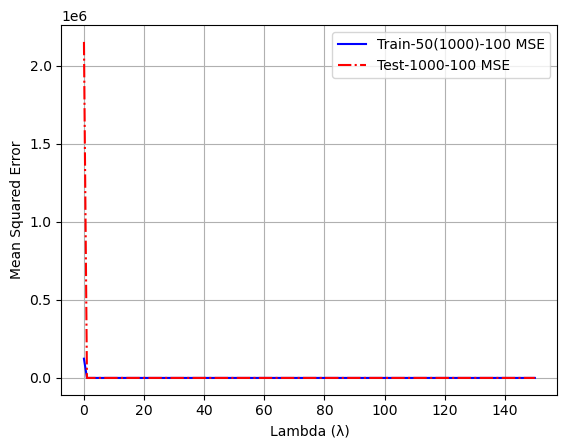

Least Test MSE: 5.206 achieved by Lambda: 19 


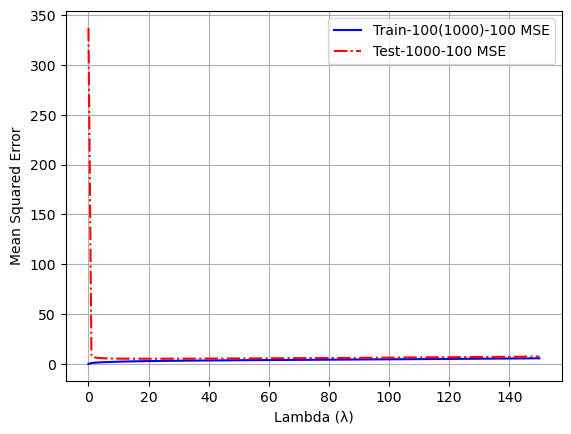

Least Test MSE: 4.849 achieved by Lambda: 23 


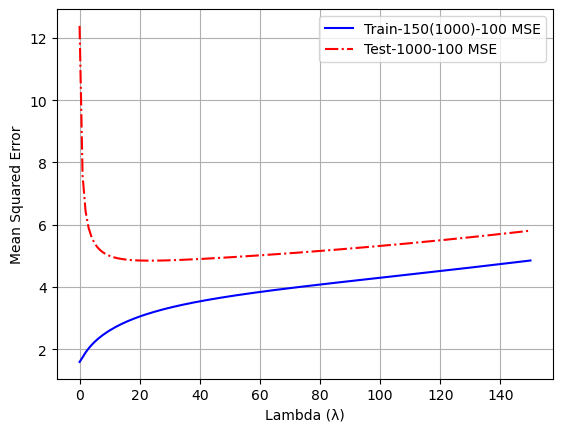

Least Test MSE: 4.160 achieved by Lambda: 8 


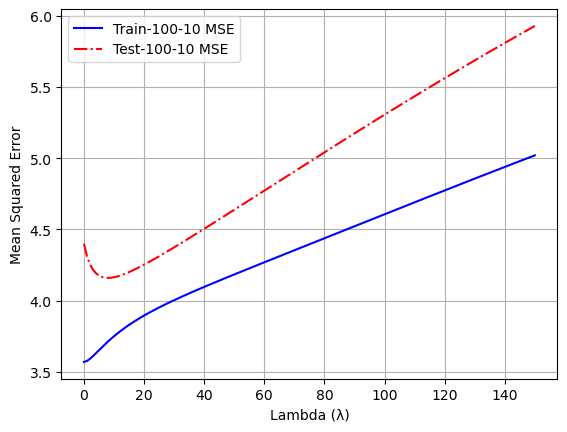

Least Test MSE: 5.078 achieved by Lambda: 22 


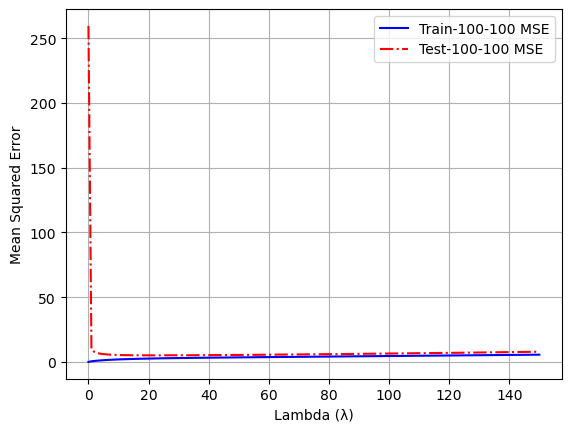

Least Test MSE: 4.316 achieved by Lambda: 27 


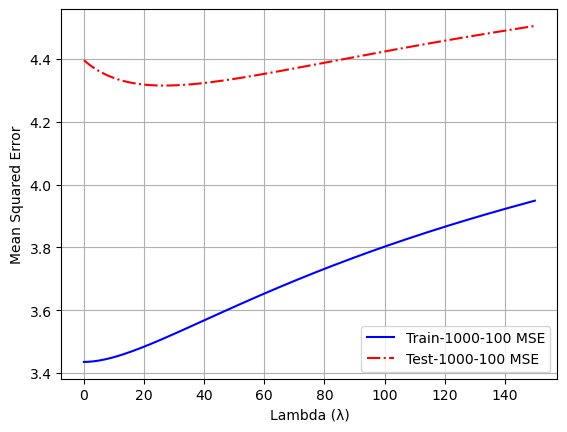

In [53]:
for train, test, train_name, test_name in datasets:
    mse_train, mse_test = get_mse(train, test, lambdas)
    minTest = min(mse_test)
    print(f"Least Test MSE: {minTest:.3f} achieved by Lambda: {lambdas[mse_test.index(minTest)]} ")
    plot_mse(mse_train, mse_test, train_name, test_name, lambdas)
    

### c) Explain why λ = 0 (i.e., no regularization) gives abnormally large MSEs for those three datasets in (b).

    - The main reason why lambda=0 gives a large MSE for the first three datasets is because of Overfitting. Because regularization hasn't been implemented, the model tries to fit all the training data and resulting in an overly complex model. As a result, the model's ability to generalize decreases and the prediction will deviate from the true value.